In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather the data
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# In this notebook we will ask questions of whether undergrad major, formal education, or parent education correlates with concern about job security

In [323]:
#Asses the data in the next number of cells
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [324]:
df.MajorUndergrad.value_counts()

Computer science or software engineering                        8098
Computer engineering or electrical/electronics engineering      1645
Computer programming or Web development                         1311
Information technology, networking, or system administration     754
A natural science                                                701
Mathematics or statistics                                        667
A non-computer-focused engineering discipline                    652
A business discipline                                            341
Something else                                                   333
A humanities discipline                                          323
Management information systems                                   257
Fine arts or performing arts                                     229
A social science                                                 228
I never declared a major                                         222
Psychology                        

In [325]:
df.HighestEducationParents.value_counts()

A bachelor's degree                                    3671
A master's degree                                      2825
High school                                            2233
Some college/university study, no bachelor's degree    1718
A doctoral degree                                       748
A professional degree                                   570
Primary/elementary school                               516
I don't know/not sure                                   278
I prefer not to answer                                  224
No education                                             70
Name: HighestEducationParents, dtype: int64

In [326]:
df.FormalEducation.value_counts()

Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64

In [327]:
df.info(max_cols=155)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 154 columns):
Respondent                          19102 non-null int64
Professional                        19102 non-null object
ProgramHobby                        19102 non-null object
Country                             19102 non-null object
University                          19102 non-null object
EmploymentStatus                    19102 non-null object
FormalEducation                     19102 non-null object
MajorUndergrad                      15899 non-null object
HomeRemote                          16471 non-null object
CompanySize                         14653 non-null object
CompanyType                         14609 non-null object
YearsProgram                        19005 non-null object
YearsCodedJob                       15391 non-null object
YearsCodedJobPast                   349 non-null object
DeveloperType                       13772 non-null object
WebDeveloperType       

In [328]:
df.JobSecurity.value_counts()

Agree                5208
Somewhat agree       3112
Strongly agree       2749
Disagree              930
Strongly disagree     199
Name: JobSecurity, dtype: int64

In [329]:
print(schema.to_string())

                               Column                                           Question
0                          Respondent                               Respondent ID number
1                        Professional         Which of the following best describes you?
2                        ProgramHobby  Do you program as a hobby or contribute to ope...
3                             Country            In which country do you currently live?
4                          University  Are you currently enrolled in a formal, degree...
5                    EmploymentStatus  Which of the following best describes your cur...
6                     FormalEducation  Which of the following best describes the high...
7                      MajorUndergrad  Which of the following best describes your mai...
8                          HomeRemote       How often do you work from home or remotely?
9                         CompanySize  In terms of the number of employees, how large...
10                   

In [330]:
schema[schema.Column=='JobSecurity'].Question

33    Job security is important to me
Name: Question, dtype: object

In [331]:
#Clean the data in the next number of cells
#We create a dataframe that just retains the columsn of interest to us
df_q = df[['MajorUndergrad','FormalEducation','HighestEducationParents','JobSecurity']]

In [332]:
df_q.head()

,MajorUndergrad,FormalEducation,HighestEducationParents,JobSecurity
0,NaN,Secondary school,High school,Strongly agree
1,Computer science or software engineering,Some college/university study without earning ...,A master's degree,NaN
2,Computer science or software engineering,Bachelor's degree,A professional degree,Agree
3,A non-computer-focused engineering discipline,Doctoral degree,A doctoral degree,Somewhat agree
4,Computer science or software engineering,Master's degree,NaN,NaN


In [333]:
#We drop any rows that include NaN values in Job Security since this is the answer we seek for each question. 
df_nonan = df_q.dropna(subset=['JobSecurity'],axis=0)

In [334]:
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12198 entries, 0 to 19096
Data columns (total 4 columns):
MajorUndergrad             10375 non-null object
FormalEducation            12198 non-null object
HighestEducationParents    9759 non-null object
JobSecurity                12198 non-null object
dtypes: object(4)
memory usage: 476.5+ KB


## We change the job security values to a rating range of 1-5, from strongly disagree to strongly agree.

In [335]:
df_nonan.JobSecurity.value_counts().index

Index(['Agree', 'Somewhat agree', 'Strongly agree', 'Disagree',
       'Strongly disagree'],
      dtype='object')

In [336]:
#This maps job security terms to numbers, as described in the last markdown cell 
df_num = df_nonan.copy()
df_num.JobSecurity = df_nonan.JobSecurity.map({'Agree':4, 'Somewhat agree':3, 'Strongly agree':5, 'Disagree':2,
       'Strongly disagree':1})

In [337]:
df_num.head()

,MajorUndergrad,FormalEducation,HighestEducationParents,JobSecurity
0,NaN,Secondary school,High school,5
2,Computer science or software engineering,Bachelor's degree,A professional degree,4
3,A non-computer-focused engineering discipline,Doctoral degree,A doctoral degree,3
8,Computer science or software engineering,Bachelor's degree,A bachelor's degree,4
14,Computer engineering or electrical/electronics...,Professional degree,High school,3


### First we ask the question if undergrad major seems to correlate with the concern for job security

In [338]:
df_num.MajorUndergrad.value_counts().index.tolist()

['Computer science or software engineering',
 'Computer engineering or electrical/electronics engineering',
 'Computer programming or Web development',
 'Information technology, networking, or system administration',
 'A natural science',
 'Mathematics or statistics',
 'A non-computer-focused engineering discipline',
 'Something else',
 'A humanities discipline',
 'A business discipline',
 'Management information systems',
 'Fine arts or performing arts',
 'I never declared a major',
 'A social science',
 'Psychology',
 'A health science']

In [339]:
#Analyze the data in the next number of cells, which is repeated for other features
#This takes the mean of the job security measure for each undergrad major
#This method avoids having to deal with NaNs in the MajorUndergrad column since it only computes the mean for specific values 
Maj_mean = []
for i in df_num.MajorUndergrad.value_counts().index.tolist():
    Maj_mean.append(df_num[df_num.MajorUndergrad==i]['JobSecurity'].mean())

In [340]:
#This takes the standard deviations of job security ratings of the means for each undergrad major

Maj_std = []
for i in df_num.MajorUndergrad.value_counts().index.tolist():
    Maj_std.append(df_num[df_num.MajorUndergrad==i]['JobSecurity'].std())

In [341]:
#This creates a pandas series where job security rating means are matched with their majors
s_maj_mean = pd.Series(Maj_mean,df_num.MajorUndergrad.value_counts().index.tolist())

In [342]:
s_maj_mean

Computer science or software engineering                        3.764975
Computer engineering or electrical/electronics engineering      3.726761
Computer programming or Web development                         3.873950
Information technology, networking, or system administration    3.892562
A natural science                                               3.763598
Mathematics or statistics                                       3.703371
A non-computer-focused engineering discipline                   3.633867
Something else                                                  3.847534
A humanities discipline                                         3.834081
A business discipline                                           3.806306
Management information systems                                  3.737805
Fine arts or performing arts                                    3.732026
I never declared a major                                        3.617450
A social science                                   

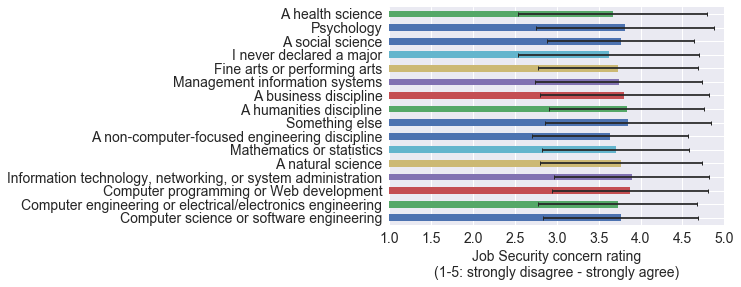

In [343]:
#visualize the data, which is repeated for the other features
#This plots undergrad major vs. job security rating
plt.figure()
plt.style.use('seaborn')
s_maj_mean.plot(kind='barh',xerr = Maj_std, fontsize=14,capsize=2,error_kw=dict(capthick=1))
plt.xlim(1,5)
plt.xlabel('Job Security concern rating\n(1-5: strongly disagree - strongly agree)',fontsize=14)
plt.show()
plt.savefig('maj_jobsec.pdf')

#### Under grad major does not appear to correlate with variance over job security concern. The average for each category is between 'somewhat agree' and 'agree', though closer to 'agree'. Values lower in the chart correspond to more science or computer related fields, which shows no increase or decrease in that direction.

### Next we see if formal education shows a correlation with job security concerns.

In [344]:
df_num.FormalEducation.value_counts().index.tolist()

["Bachelor's degree",
 "Master's degree",
 "Some college/university study without earning a bachelor's degree",
 'Secondary school',
 'Doctoral degree',
 'Primary/elementary school',
 'I prefer not to answer',
 'Professional degree',
 'I never completed any formal education']

In [345]:
#this takes the mean of the job security measure for each formal education
formedu_mean = []
for i in df_num.FormalEducation.value_counts().index.tolist():
    formedu_mean.append(df_num[df_num.FormalEducation==i]['JobSecurity'].mean())

In [346]:
#This creates a pandas series where job security rating means are matched with their formal education
s_formedu_mean = pd.Series(formedu_mean,df_num.FormalEducation.value_counts().index.tolist())

In [347]:
s_formedu_mean

Bachelor's degree                                                    3.812416
Master's degree                                                      3.677550
Some college/university study without earning a bachelor's degree    3.780539
Secondary school                                                     3.769985
Doctoral degree                                                      3.783562
Primary/elementary school                                            3.767773
I prefer not to answer                                               3.806763
Professional degree                                                  3.732919
I never completed any formal education                               3.631579
dtype: float64

In [348]:
#This is to resort them in sort of an order of increasing levels of education
s_formedu_mean_sorted = s_formedu_mean[['I prefer not to answer','I never completed any formal education',
                                                      'Primary/elementary school','Secondary school',
                                                       "Some college/university study without earning a bachelor's degree",
                                                      "Bachelor's degree","Master's degree",
                                                      "Doctoral degree","Professional degree"]]

In [349]:
s_formedu_mean_sorted 

I prefer not to answer                                               3.806763
I never completed any formal education                               3.631579
Primary/elementary school                                            3.767773
Secondary school                                                     3.769985
Some college/university study without earning a bachelor's degree    3.780539
Bachelor's degree                                                    3.812416
Master's degree                                                      3.677550
Doctoral degree                                                      3.783562
Professional degree                                                  3.732919
dtype: float64

In [350]:
#This takes the standard deviations of job security ratings of means for each formal education level

formedu_std = []
for i in s_formedu_mean_sorted.index.tolist():
    formedu_std.append(df_num[df_num.FormalEducation==i]['JobSecurity'].std())  
formedu_std    

[0.9406425489308137,
 1.0935215926922572,
 0.9700781831048675,
 0.9123245862716516,
 0.9494982940922287,
 0.9296821653554086,
 0.9336848241015702,
 0.9719999913272377,
 1.0170899909493953]

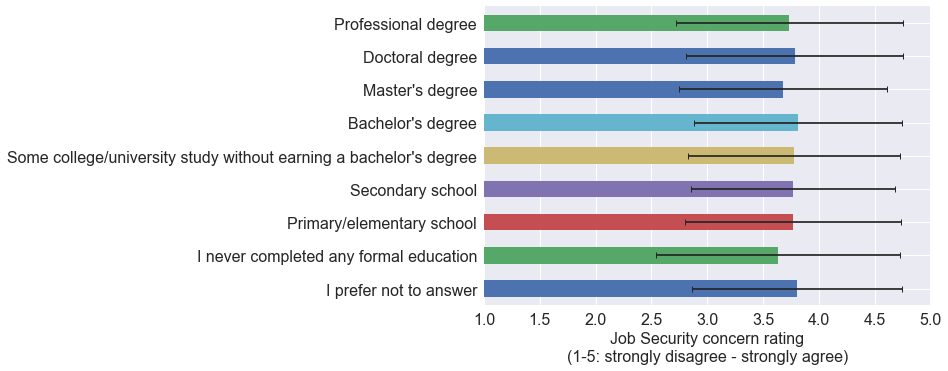

In [351]:
#This plots undergrad formal education vs. job security rating
plt.figure()
plt.style.use('seaborn')
s_formedu_mean_sorted.plot(kind='barh',xerr = formedu_std, fontsize=16,capsize=3,error_kw=dict(capthick=1))
plt.xlim(1,5)
plt.xlabel('Job Security concern rating\n(1-5: strongly disagree - strongly agree)',fontsize=16)
plt.show()
plt.savefig('formedu_jobsec.pdf')

#### Formal education does not seem to correlate with job security concerns. No increase or decrease is seen with increasing levels of formal education. The range corresponds closely to that of undergrad major.

### Lastly we see if parent education correlated with a job security concern.

In [352]:
df_num.HighestEducationParents.value_counts().index.tolist()

["A bachelor's degree",
 "A master's degree",
 'High school',
 "Some college/university study, no bachelor's degree",
 'A doctoral degree',
 'A professional degree',
 'Primary/elementary school',
 "I don't know/not sure",
 'I prefer not to answer',
 'No education']

In [353]:
#this takes the mean of the job security measure for each formal education
edupar_mean = []
for i in df_num.HighestEducationParents.value_counts().index.tolist():
    edupar_mean.append(df_num[df_num.HighestEducationParents==i]['JobSecurity'].mean())

In [354]:
#This creates a pandas series where job security rating means are matched with their parents' formal education
s_edupar_mean = pd.Series(edupar_mean,df_num.HighestEducationParents.value_counts().index.tolist())

In [355]:
s_edupar_mean

A bachelor's degree                                    3.794872
A master's degree                                      3.691370
High school                                            3.776775
Some college/university study, no bachelor's degree    3.834966
A doctoral degree                                      3.651460
A professional degree                                  3.693023
Primary/elementary school                              3.711688
I don't know/not sure                                  3.845771
I prefer not to answer                                 3.819767
No education                                           3.690909
dtype: float64

In [356]:
#This is to resort them in sort of an order of increasing levels of education
s_edupar_mean_sorted = s_edupar_mean[['I prefer not to answer',"I don't know/not sure",'No education',
                                                      'Primary/elementary school','High school',
                                                       "Some college/university study, no bachelor's degree",
                                                      "A bachelor's degree","A master's degree",
                                                      "A doctoral degree","A professional degree"]]

In [357]:
s_edupar_mean_sorted

I prefer not to answer                                 3.819767
I don't know/not sure                                  3.845771
No education                                           3.690909
Primary/elementary school                              3.711688
High school                                            3.776775
Some college/university study, no bachelor's degree    3.834966
A bachelor's degree                                    3.794872
A master's degree                                      3.691370
A doctoral degree                                      3.651460
A professional degree                                  3.693023
dtype: float64

In [358]:
#This takes the standard deviations of job security ratings of means for each formal education level

edupar_std = []
for i in s_edupar_mean_sorted.index.tolist():
    edupar_std.append(df_num[df_num.HighestEducationParents==i]['JobSecurity'].std()) 
edupar_std

[0.8495364773228915,
 0.9225478455685564,
 1.0864949979044454,
 0.897039985692242,
 0.9324517648124488,
 0.9460793007691806,
 0.9233073872465598,
 0.9172524416142609,
 0.9754095676744006,
 0.9355440058439253]

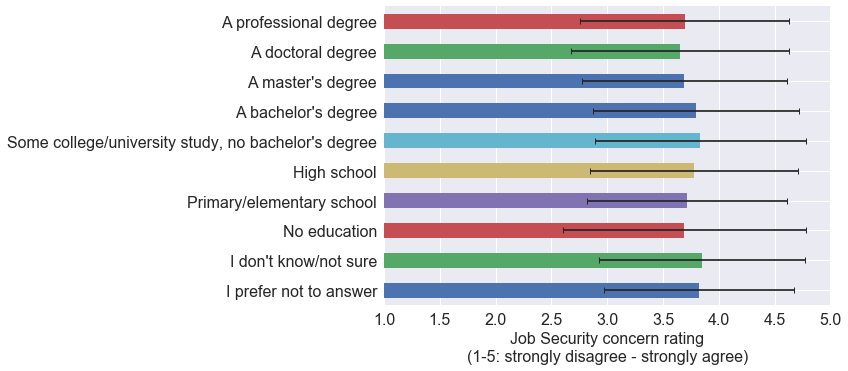

In [359]:
#This plots undergrad parent formal education vs. job security rating
plt.figure()
plt.style.use('seaborn')
s_edupar_mean_sorted.plot(kind='barh', xerr = edupar_std,fontsize=16,capsize=3,error_kw=dict(capthick=1))
plt.xlim(1,5)
plt.xlabel('Job Security concern rating\n(1-5: strongly disagree - strongly agree)',fontsize=16)
plt.show()
plt.savefig('edupar_jobsec.pdf')

#### Their parents' formal education does not seem to correlate with job security concerns. No increase or decrease is seen with increasing levels of formal education.  The range corresponds closely to that of undergrad major and formal education.

# Thus none of the features of undergrad major, formal education, or parents' formal education seem to correlate to a concern over job security. At least, there is no change in mean to different levels of job security concerns. They all exhibit similar means and standard deviations.

In [360]:
#no model is needed since there is a lack of any correlations